In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', None,'display.max_columns', None)
import pygplates
import plotly.express as px

%matplotlib inline
from utils_ed0629 import *
%load_ext autoreload
%autoreload 2


#### 1. Load the paleomagnetic data from Evans et al. (2021), from which extract the Ediacaran dataset

In [3]:
df_Apoles = select_Evans_poles(Evans_category='Apoles', age_interval=[500, 650])
df_Bpoles = select_Evans_poles(Evans_category='Bpoles', age_interval=[500, 650])
print(df_Apoles.Craton.unique(), df_Bpoles.Craton.unique())

df_AB = pd.concat([df_Apoles, df_Bpoles]).sort_values(by=['Craton', 'Category', 'Max'])
df_AB = df_AB[~df_AB.Craton.isin(['India'])]
df_AB['Antipole'] = int(0)
df_AB.head(2)


['Baltica' 'Congo' 'Rio de la Plata'] ['Baltica' 'Congo' 'India' 'Laurentia' 'Rio de la Plata' 'West Africa']


,Craton,Rockname_component,GPMDB_result#,SLAT,SLONG,PLAT,PLONG,A95,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q,R1,R2,R3,R4,R5,R6,R7,R,Nominal_age,Min,Max,Reference (separate age ref when that antedates the most recent pmag study),Year,Category,Reference,"Principal_shortcoming (with narrative if Q1,2,4,5 all satisfied)",Antipole
21,Baltica,Kurgashlya formation,9536,53.3,57.5,50.9,314.5,5.3,1,1,1,0,1,1,1,6,1.0,1.0,1.0,0,1.0,1.0,1.0,6.0,565,560,570,Lubnina et al. (age estimated only),2014,A,NaN,NaN,0
22,Baltica,Bakeevo formation,9537,54.9,58.2,42.3,299.1,5.3,1,1,1,g,1,1,1,7,1.0,1.0,1.0,g,1.0,1.0,1.0,7.0,565,560,570,Lubnina et al. (age estimated only),2014,Aq4,NaN,NaN,0


##### 1.1 Age distribution of the Ediacaran data

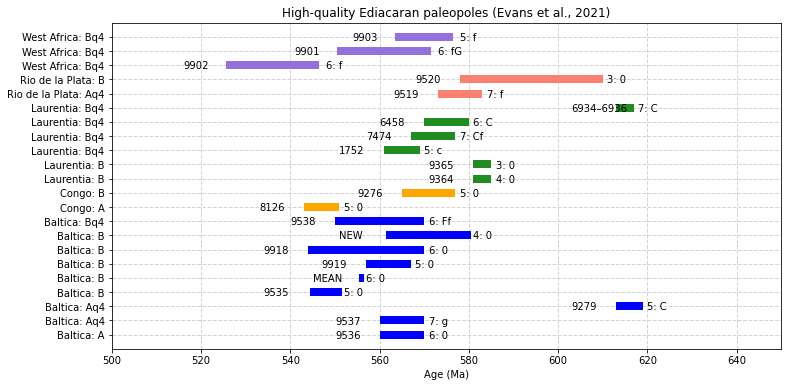

In [4]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)
j, k = 0, 0

for i, row in df_AB.iterrows():
    if row.Craton == 'Amazonia': bcolor = 'c' # 'Baltica', 'Congo', 'Rio de la Plata', 'India', 'Laurentia', 'West Africa'
    elif row.Craton == 'Baltica': bcolor = 'b'
    elif row.Craton == 'Laurentia': bcolor = 'forestgreen'
    elif row.Craton == 'Rio de la Plata': bcolor = 'salmon'
    elif row.Craton == 'Congo': bcolor = 'orange'
    elif row.Craton == 'West Africa': bcolor = 'mediumpurple'
    plt.errorbar(row.Nominal_age, j+1, yerr=0, xerr=(row.Max-row.Min)/2, color=bcolor, ecolor=None, elinewidth=8, capsize=0, capthick=0, ls='none', label=None)
    j += 1
for i, row in df_AB.iterrows():
    plt.annotate(f"{row.Q}: {row.Q4}", (row.Max+1, k+.75))
    plt.annotate(f"{row['GPMDB_result#']}", (row.Min-10, k+.75))
    k += 1

label_all = []
for i in (df_AB.Craton + ': ' + df_AB.Category).tolist(): label_all.append(i) 
plt.yticks(ticks=np.arange(1,len(df_AB)+1), labels=label_all);
ax1.set_xlim(500, 650)
ax1.set_ylim(0, len(df_AB)+1)
plt.xlabel('Age (Ma)')
plt.grid(color='lightgrey', linestyle='--', linewidth=1) # plt.grid(True)
plt.title('High-quality Ediacaran paleopoles (Evans et al., 2021)');


#### 2. Determination of paleomagnetic bias
##### 2.1 Determine the pair of minimum spherical distance (varialbe name: RecEMin) and model-dependent paleopole age (within its age range, varialbe name: RecEMinAge)

In [5]:
gdf_E21_Ama_R21, gdf_E21_balt_R21, gdf_E21_lau_R21, gdf_E21_RDLPlata_R21, gdf_E21_SF_Con_R21, gdf_E21_waf_R21 = create_gdf(df_Apoles, df_Bpoles, mname='R21', anchor_id=1, save_flagn=0)
gdf_E21_Ama_M21, gdf_E21_balt_M21, gdf_E21_lau_M21, gdf_E21_RDLPlata_M21, gdf_E21_SF_Con_M21, gdf_E21_waf_M21 = create_gdf(df_Apoles, df_Bpoles, mname='M21', anchor_id=1, save_flagn=0)
gdf_E21_Ama_M17, gdf_E21_balt_M17, gdf_E21_lau_M17, gdf_E21_RDLPlata_M17, gdf_E21_SF_Con_M17, gdf_E21_waf_M17 = create_gdf(df_Apoles, df_Bpoles, mname='M17', anchor_id=0, save_flagn=0)
gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21 = create_gdf(df_Apoles, df_Bpoles, mname='S21', anchor_id=1, save_flagn=0)
gdf_E21_Ama_L08, gdf_E21_balt_L08, gdf_E21_lau_L08, gdf_E21_RDLPlata_L08, gdf_E21_SF_Con_L08, gdf_E21_waf_L08 = create_gdf(df_Apoles, df_Bpoles, mname='L08', anchor_id=0, save_flagn=0)
gdf_E21_Ama_TC16, gdf_E21_balt_TC16, gdf_E21_lau_TC16, gdf_E21_RDLPlata_TC16, gdf_E21_SF_Con_TC16, gdf_E21_waf_TC16 = create_gdf(df_Apoles, df_Bpoles, mname='TC16', anchor_id=1, save_flagn=0)

##### Plot minimum spherical distances vs model-dependent paleopole ages 

Detect paleomagnetic bias by comparing the minimum spherical distances and associated A95s: a reconstruction is paleomagnetically biased if the minimum spherical distance is greater than the paleopole's A95. We define the paleomagnetic bias as follows.

Paleomagnetic bias = spherical distance - A95, where spherical distance > A95. 

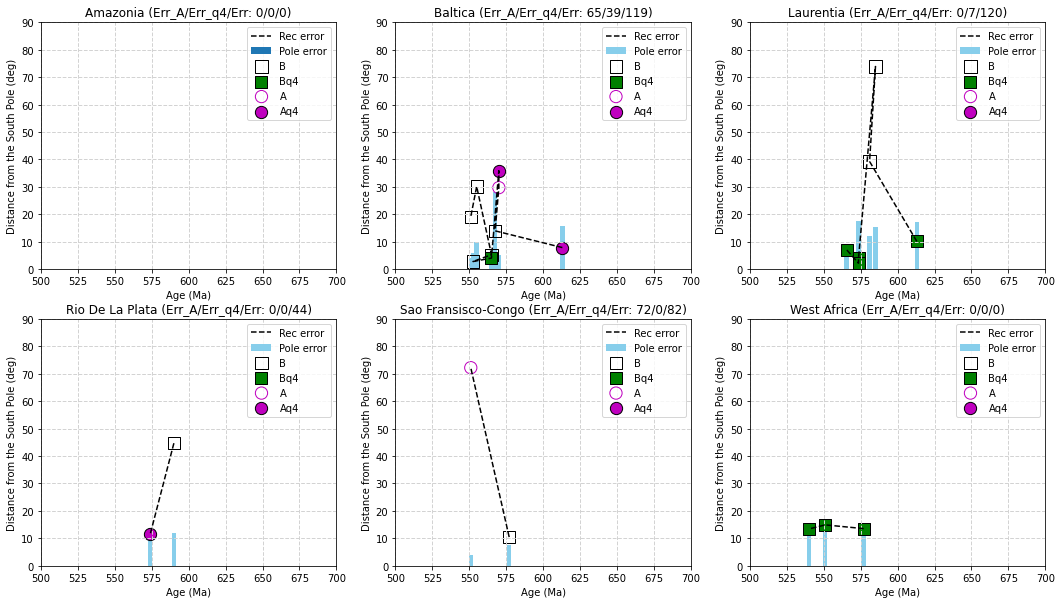

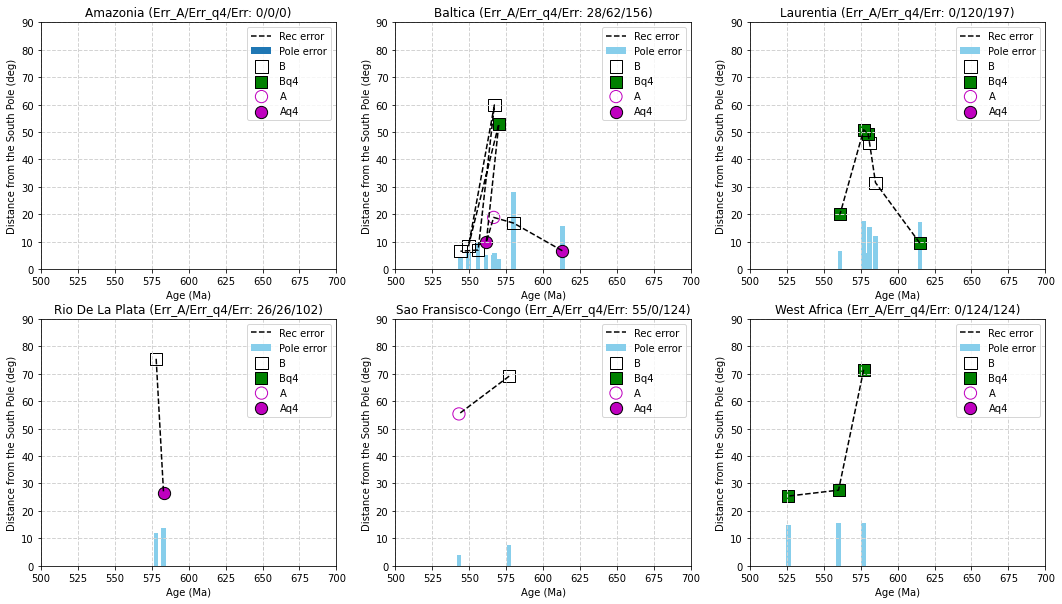

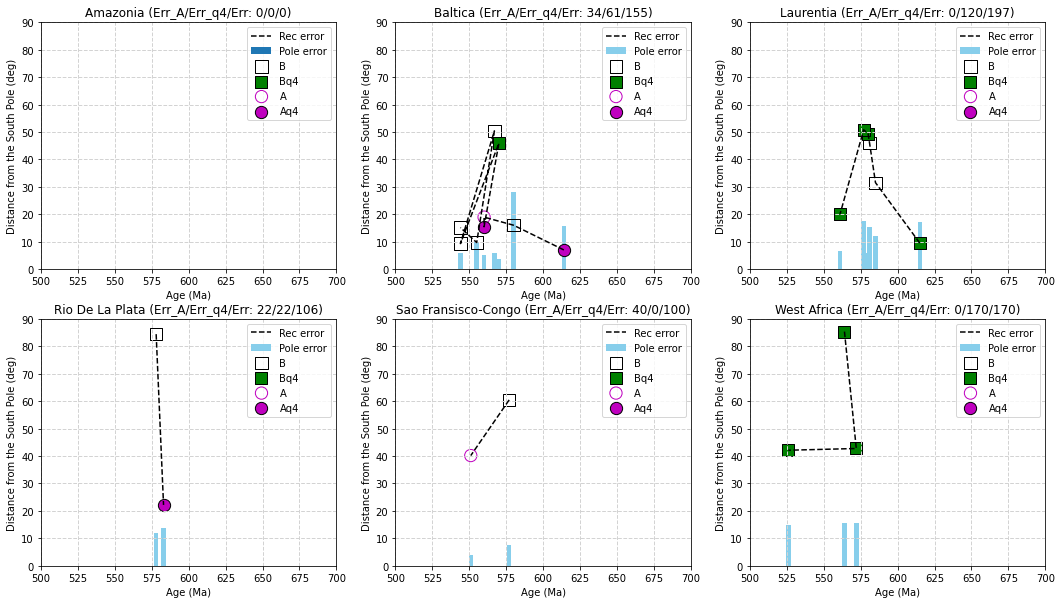

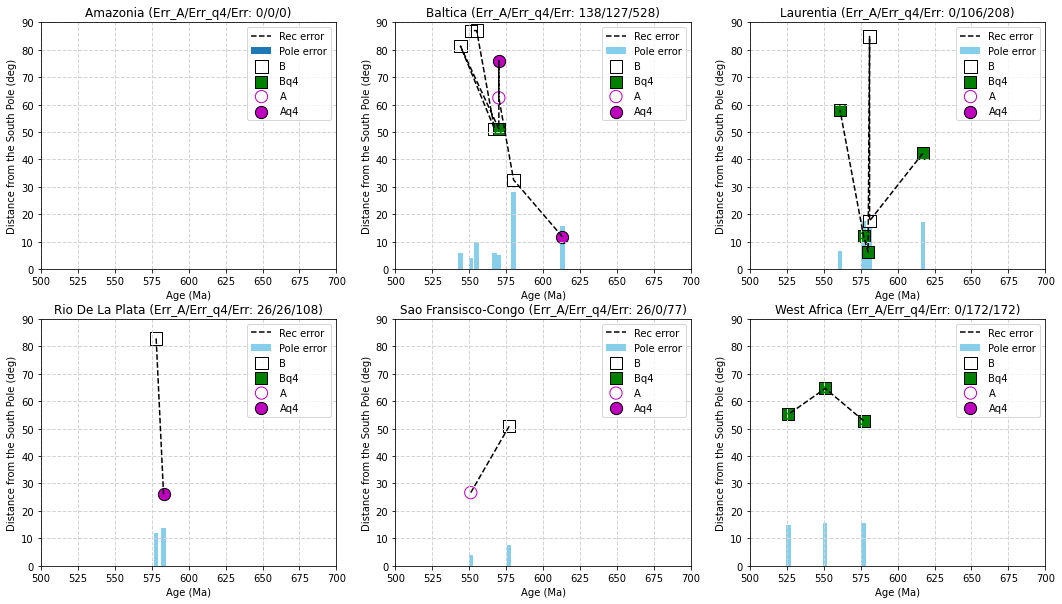

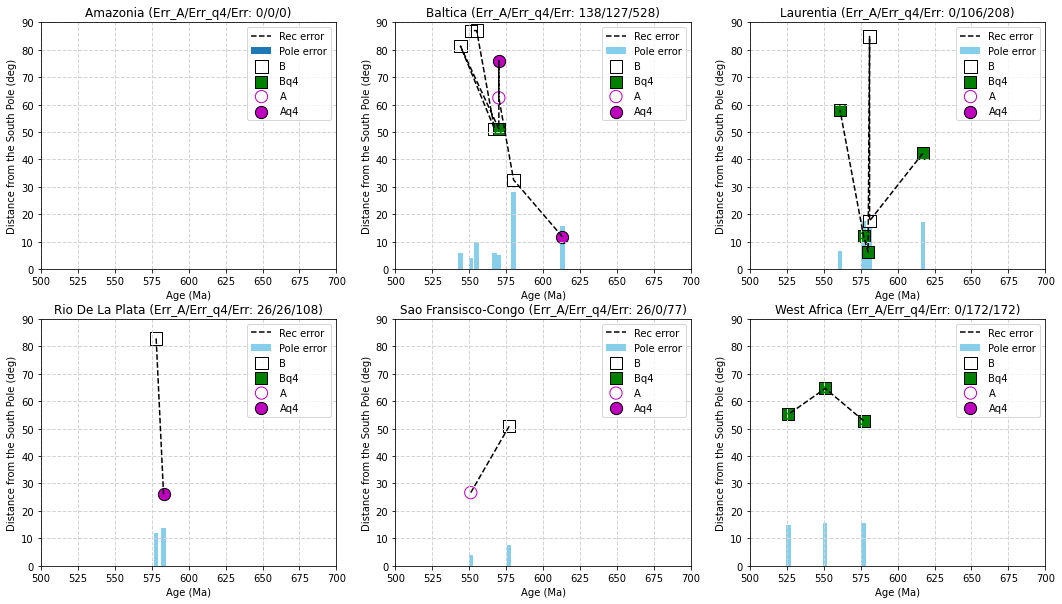

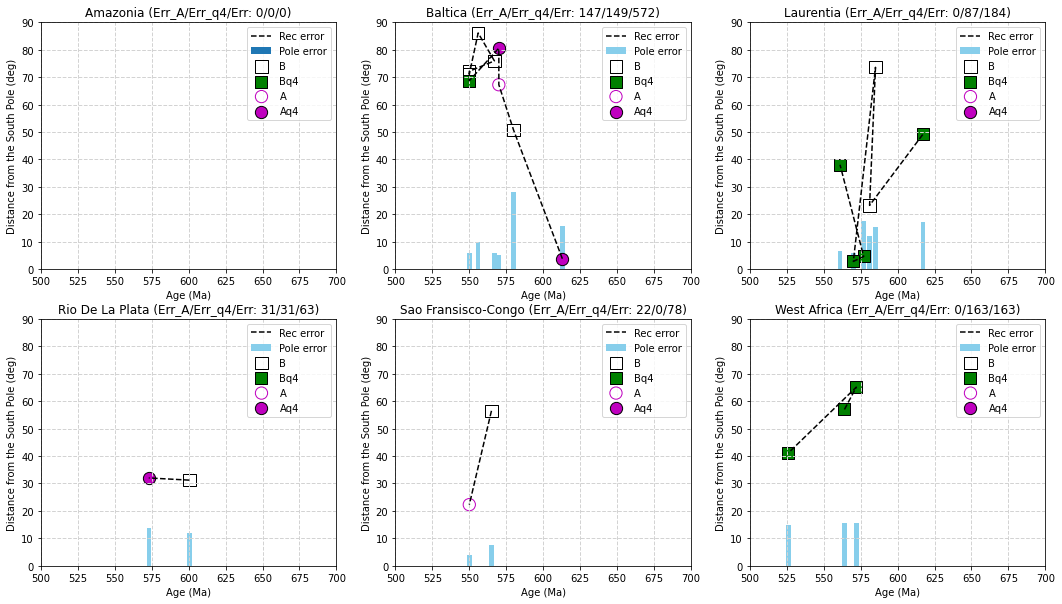

In [6]:
plot_pole_rec_err_E21_all(gdf_E21_Ama_R21, gdf_E21_balt_R21, gdf_E21_lau_R21, gdf_E21_RDLPlata_R21, gdf_E21_SF_Con_R21, gdf_E21_waf_R21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_M21, gdf_E21_balt_M21, gdf_E21_lau_M21, gdf_E21_RDLPlata_M21, gdf_E21_SF_Con_M21, gdf_E21_waf_M21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_M17, gdf_E21_balt_M17, gdf_E21_lau_M17, gdf_E21_RDLPlata_M17, gdf_E21_SF_Con_M17, gdf_E21_waf_M17, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21, MinRec0='Y')
plot_pole_rec_err_E21_all(gdf_E21_Ama_TC16, gdf_E21_balt_TC16, gdf_E21_lau_TC16, gdf_E21_RDLPlata_TC16, gdf_E21_SF_Con_TC16, gdf_E21_waf_TC16, MinRec0='Y')

##### 2.2 Quantify the paleomagnetic bias (spherical distance - A95, where spherical distance > A95) in the six competing paleogeographic models. 

Label the source (i.e., models, continents, paleopole categories) of the paleomagnetic bias (variable name: biasp). 

In [7]:
gdf_E21_balt_R21['craton'], gdf_E21_lau_R21['craton'], gdf_E21_RDLPlata_R21['craton'], gdf_E21_SF_Con_R21['craton'], gdf_E21_waf_R21['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_M21['craton'], gdf_E21_lau_M21['craton'], gdf_E21_RDLPlata_M21['craton'], gdf_E21_SF_Con_M21['craton'], gdf_E21_waf_M21['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_M17['craton'], gdf_E21_lau_M17['craton'], gdf_E21_RDLPlata_M17['craton'], gdf_E21_SF_Con_M17['craton'], gdf_E21_waf_M17['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_S21['craton'], gdf_E21_lau_S21['craton'], gdf_E21_RDLPlata_S21['craton'], gdf_E21_SF_Con_S21['craton'], gdf_E21_waf_S21['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_L08['craton'], gdf_E21_lau_L08['craton'], gdf_E21_RDLPlata_L08['craton'], gdf_E21_SF_Con_L08['craton'], gdf_E21_waf_L08['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
gdf_E21_balt_TC16['craton'], gdf_E21_lau_TC16['craton'], gdf_E21_RDLPlata_TC16['craton'], gdf_E21_SF_Con_TC16['craton'], gdf_E21_waf_TC16['craton'] = 'Baltica','Laurentia','Rio','Congo','W.Africa'
R21_cat = pd.concat([gdf_E21_Ama_R21, gdf_E21_balt_R21, gdf_E21_lau_R21, gdf_E21_RDLPlata_R21, gdf_E21_SF_Con_R21, gdf_E21_waf_R21])
M21_cat = pd.concat([gdf_E21_Ama_M21, gdf_E21_balt_M21, gdf_E21_lau_M21, gdf_E21_RDLPlata_M21, gdf_E21_SF_Con_M21, gdf_E21_waf_M21])
M17_cat = pd.concat([gdf_E21_Ama_M17, gdf_E21_balt_M17, gdf_E21_lau_M17, gdf_E21_RDLPlata_M17, gdf_E21_SF_Con_M17, gdf_E21_waf_M17])
S21_cat = pd.concat([gdf_E21_Ama_S21, gdf_E21_balt_S21, gdf_E21_lau_S21, gdf_E21_RDLPlata_S21, gdf_E21_SF_Con_S21, gdf_E21_waf_S21])
L08_cat = pd.concat([gdf_E21_Ama_L08, gdf_E21_balt_L08, gdf_E21_lau_L08, gdf_E21_RDLPlata_L08, gdf_E21_SF_Con_L08, gdf_E21_waf_L08])
TC16_cat = pd.concat([gdf_E21_Ama_TC16, gdf_E21_balt_TC16, gdf_E21_lau_TC16, gdf_E21_RDLPlata_TC16, gdf_E21_SF_Con_TC16, gdf_E21_waf_TC16])
R21_cat['model'],M21_cat['model'],M17_cat['model'],S21_cat['model'],L08_cat['model'],TC16_cat['model'] = 'R21', 'M21', 'M17', 'S21', 'L08', 'TC16'

R21_catQ4 = R21_cat[(R21_cat['Category'] == 'Aq4') | (R21_cat['Category'] == 'Bq4')]
M21_catQ4 = M21_cat[(M21_cat['Category'] == 'Aq4') | (M21_cat['Category'] == 'Bq4')]
M17_catQ4 = M17_cat[(M17_cat['Category'] == 'Aq4') | (M17_cat['Category'] == 'Bq4')]
S21_catQ4 = S21_cat[(S21_cat['Category'] == 'Aq4') | (S21_cat['Category'] == 'Bq4')]
L08_catQ4 = L08_cat[(L08_cat['Category'] == 'Aq4') | (L08_cat['Category'] == 'Bq4')]
TC16_catQ4 = TC16_cat[(TC16_cat['Category'] == 'Aq4') | (TC16_cat['Category'] == 'Bq4')]

models_cat = pd.concat([R21_cat,M21_cat,M17_cat,S21_cat,L08_cat,TC16_cat]).reset_index()
models_cat['bias'], models_cat['biasA'], models_cat['biasp'], models_cat['Q4YN'], models_cat['grade'] = np.nan, np.nan, np.nan, '', ''
models_cat['bias'] = models_cat['RecEMin'] - models_cat['poleA95']
models_cat['biasp'] = models_cat['bias'] 
models_cat.loc[models_cat.bias<0, 'biasp'] = 0
models_cat['biasA'] = np.absolute(np.array(models_cat['bias'].tolist()))
models_cat.loc[models_cat.bias<0, 'craton'] = 'InErr'
models_cat.loc[(models_cat.Category=='Aq4') | (models_cat.Category=='Bq4'), 'Q4YN'] = 'Q4Y'
models_cat.loc[(models_cat.Category=='A') | (models_cat.Category=='B'), 'Q4YN'] = 'Q4N'
models_cat.loc[(models_cat.Category=='Aq4') | (models_cat.Category=='A'), 'grade'] = 'A-grade'
models_cat.loc[(models_cat.Category=='Bq4') | (models_cat.Category=='B'), 'grade'] = 'B-grade'
# models_cat = models_cat.reset_index()
models_catbias = models_cat[models_cat['RecEMin'] > models_cat['poleA95']]
models_catbiasno = models_cat[models_cat['RecEMin'] <= models_cat['poleA95']]
models_catQ4 = models_cat[(models_cat['Category'] == 'Aq4') | (models_cat['Category'] == 'Bq4')]
models_catQ4bias = models_catQ4[models_catQ4['RecEMin'] > models_catQ4['poleA95']]
models_catQ4biasno = models_catQ4[models_catQ4['RecEMin'] <= models_catQ4['poleA95']]
models_cat.columns


Index(['index', 'name', 'Category', 'Plon', 'Plat', 'poleA95', 'FROMAGE',
       'TOAGE', 'plateid', 'Rlon', 'Rlat', 'RecE', 'RecEAge', 'RlonMin',
       'RlatMin', 'RecEMin', 'RecEMinAge', 'Coordinates', 'GPMDB_result#',
       'craton', 'model', 'bias', 'biasA', 'biasp', 'Q4YN', 'grade'],
      dtype='object')

In [8]:
models_cat.head(2)


,index,name,Category,Plon,Plat,poleA95,FROMAGE,TOAGE,plateid,Rlon,Rlat,RecE,RecEAge,RlonMin,RlatMin,RecEMin,RecEMinAge,Coordinates,GPMDB_result#,craton,model,bias,biasA,biasp,Q4YN,grade
0,23,Egersund dykes,Aq4,44.1,31.4,15.7,619.0,613.0,302.0,-74.419518,-170.029859,15.580482,616.0,-82.089682,-157.790054,7.910318,613.0,"POLYGON ((44.10000 15.73168, 40.65468 16.05326...",9279,InErr,R21,-7.789682,7.789682,0.0,Q4Y,A-grade
1,40,40,B,184.4,-19.8,28.3,580.0,561.0,302.0,59.601775,166.621194,30.398225,571.0,75.998902,102.862974,14.001098,567.5,"POLYGON ((-175.60000 -47.99900, 175.85893 -47....",NEW,InErr,R21,-14.298902,14.298902,0.0,Q4N,B-grade


#### 3. Visualization of the paleomagnetic bias in the paleogeographic models
##### Distribution of the paleomagnetic bias (variable name: biasp) by models, continents, paleopole categories

In [9]:
fig = px.bar(models_cat, x="RecEMinAge", y="biasp", color="craton",  barmode="group", facet_col="model", facet_row='Category',hover_data=['GPMDB_result#','FROMAGE','TOAGE', 'RecEMin','poleA95','name'], color_discrete_sequence=["black","blue", "green","salmon", "orange", "mediumpurple"], height=600)
fig.update_traces(width=3, opacity=0.5)#, marker_color=['rgb(255,0,0)','rgb(255,0,0)', 'rgb(255,0,0)', 'rgb(255,0,0)']
fig.update_layout(template="simple_white", legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=1))
fig.update_xaxes(showgrid=False, gridwidth=1, mirror=True)
fig.update_yaxes(range=[0, 90],showgrid=True, gridwidth=1, mirror=True)
fig.show()


##### Interative nested pie charts showing the breakdown reasons (i.e., models, continents, paleopole categories) of the paleomagnetic bias (variable name: biasp)

In [10]:
for mname in ['R21', 'M21', 'M17', 'S21', 'L08', 'TC16']:
    if mname == 'M21':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["green","blue", "orange", "mediumpurple", "salmon"])
    elif mname == 'M17':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["green","blue",  "mediumpurple", "orange","salmon"])
    elif mname == 'L08' or mname == 'R21':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["blue", "green","orange","salmon", "mediumpurple"])
    elif mname == 'S21':
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["blue", "green","mediumpurple","salmon", "orange"])
    else:
        fig = px.sunburst(models_cat[models_cat.model==mname], path=['model','craton','Q4YN','Category','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["blue", "green","mediumpurple", "orange","salmon"])
    fig.update_layout(uniformtext=dict(minsize=9))
    fig.update_traces(opacity=0.6)
    fig.show()



##### Tabularize the cumulative paleomagnetic bias by models, continents, and paleopole categories

In [11]:
model_metrics = []
for model in models_cat.model.unique().tolist():
    model_metric = []
    for craton in models_cat.craton.unique().tolist():
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.craton == craton)].biasp.sum())
    for pole_class in ['Aq4', 'Bq4', 'A', 'B']:
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.Category == pole_class)].biasp.sum())
    for pole_class in models_cat.grade.unique().tolist():
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.grade == pole_class)].biasp.sum())
    for pole_class in models_cat.Q4YN.unique().tolist():
        model_metric.append(models_cat[(models_cat.model == model) & (models_cat.Q4YN == pole_class)].biasp.sum())
    model_metric.append(models_cat[models_cat.model == model].biasp.sum())
    model_metrics.append(model_metric)

pm_bias = pd.DataFrame.from_records(model_metrics)
pm_bias.columns = ['InErr', 'Baltica', 'Laurentia', 'Rio', 'Congo', 'W.Africa','Aq4', 'Bq4', 'A', 'B','A-grade', 'B-grade', 'Q4Y', 'Q4N', 'Total']
pm_bias.index = ['R21', 'M21', 'M17', 'S21', 'L08', 'TC16']
pm_bias.sort_values(by=['Total'])


,InErr,Baltica,Laurentia,Rio,Congo,W.Africa,Aq4,Bq4,A,B,A-grade,B-grade,Q4Y,Q4N,Total
R21,0.0,90.626025,86.126954,32.552577,71.125314,0.000000,30.604226,0.665672,92.687272,156.473701,123.291497,157.139373,31.269898,249.160973,280.430871
M21,0.0,126.457808,140.171683,76.040347,112.894828,78.139599,17.349107,217.377166,65.019223,233.958770,82.368329,451.335936,234.726272,298.977993,533.704265
M17,0.0,125.004934,140.171683,80.552091,89.085468,123.932245,18.464922,256.081429,49.958188,234.241882,68.423110,490.323311,274.546351,284.200070,558.746421
L08,0.0,200.715726,142.775539,83.708462,116.482694,77.969303,92.500685,221.768646,95.927139,211.455254,188.427824,433.223900,314.269330,307.382393,621.651724
TC16,0.0,503.829325,132.501910,37.198577,67.225535,116.924794,93.343504,244.874464,80.291945,439.170230,173.635449,684.044693,338.217967,519.462174,857.680142
S21,0.0,459.930211,151.398308,82.851009,66.005971,126.361623,82.690507,250.101770,79.910640,473.844204,162.601148,723.945974,332.792278,553.754844,886.547122


##### Count the number of paleopoles violated

In [12]:
model_metricsN = []
for model in models_cat.model.unique().tolist():
    model_metricN = []
    for craton in models_cat.craton.unique().tolist():
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.craton == craton)].biasp.shape[0])
    for pole_class in ['Aq4', 'Bq4', 'A', 'B']:
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.Category == pole_class) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    for pole_class in models_cat.grade.unique().tolist():
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.grade == pole_class) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    for pole_class in models_cat.Q4YN.unique().tolist():
        model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.Q4YN == pole_class) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    model_metricN.append(models_cat[(models_cat.model == model) & (models_cat.poleA95 < models_cat.RecEMin)].biasp.shape[0])
    model_metricsN.append(model_metricN)

pm_biasN = pd.DataFrame.from_records(model_metricsN)
pm_biasN.columns = ['InErr', 'Baltica', 'Laurentia', 'Rio', 'Congo', 'W.Africa','Aq4', 'Bq4', 'A', 'B','A-grade', 'B-grade', 'Q4Y', 'Q4N', 'Total']
pm_biasN.index = ['R21', 'M21', 'M17', 'S21', 'L08','TC16']
pm_biasN.sort_values(by=['Total'])

,InErr,Baltica,Laurentia,Rio,Congo,W.Africa,Aq4,Bq4,A,B,A-grade,B-grade,Q4Y,Q4N,Total
R21,11,5,3,1,2,0,1,2,2,6,3,8,3,8,11
M21,4,6,5,2,2,3,2,7,2,7,4,14,9,9,18
M17,4,6,5,2,2,3,2,7,2,7,4,14,9,9,18
L08,3,8,4,2,2,3,2,6,2,9,4,15,8,11,19
TC16,3,8,4,2,2,3,2,6,2,9,4,15,8,11,19
S21,2,8,5,2,2,3,2,7,2,9,4,16,9,11,20


##### Rescale the cumulative bias by the number of paleopoles violated

In [13]:
pm_bias_norm = pm_bias.sort_values(by=['Total']) / pm_biasN.sort_values(by=['Total'])

##### Aggregate the paleomagnetic bias at the model level

In [14]:
fig = px.sunburst(models_cat, path=['model','craton'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'],color_discrete_sequence=["darkred","darkred","darkred","darkred","darkred","darkred"])
fig.update_traces(opacity=0.6)
fig.update_layout(uniformtext=dict(minsize=9))
fig.show()

fig = px.sunburst(models_cat, path=['model','Q4YN','Category','craton','GPMDB_result#'], values='biasp', hover_data=['FROMAGE','TOAGE', 'RecEMinAge','RecEMin','poleA95'])#,color_discrete_sequence=["lightblue","lightcoral","lightyellow","lightsteelblue","lightgreen"])
fig.show()

Conceptual figure

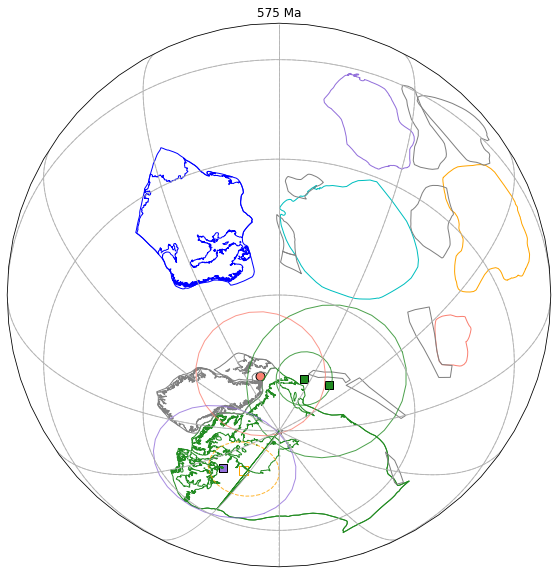

In [15]:
def plot_global_av_recon(mname='R21', projtype='orth', ages=[575], plotpolesflag=1, subplots_grid=[1, 1, 0], savefigflag=0):
    # [Amazonia, Baltica, Laurentia, RDLPlata, Sao Fransisco-Congo, West Africa]
    if mname == 'R21': plateids = [2201, 302, 101, 2203, 7701, 7703]
    elif mname == 'S21': plateids = [201, 301, 101, 202, 701, 714] 
    elif mname == 'M21': plateids = [201, 302, 101, 22041, 701, 714]
    elif mname == 'M17': plateids = [2201, 3001, 1001, 2203, 7701, 7703]
    elif mname == 'L08': plateids = [201, 302, 199, 294, 717, 714]
    elif mname == 'TC16': plateids = [201, 302, 101, 202, 701, 714]

    cmap_plateids = pd.DataFrame({'plateids': plateids, 'cmapind': [ 'c', 'b', 'forestgreen', 'salmon', 'orange', 'mediumpurple']})

    # recon_ages = np.arange(650, 520, -40.)
    recon_ages = ages

    fig = plt.figure(figsize=(15, 10))
    # equdist, ortho, mollw, robin
    # proj, subplots_grid, camera_Angle, anchor_id = 'ortho', [2, 3, 0], [-160, -45], 1
    if projtype == 'orth': proj, camera_Angle, anchor_id = 'ortho', [-30, -60], 1

    j = 0
    for k, recon_age in enumerate(recon_ages):

        subplots_grid[2] = k + 1
        
        # initiate map projection and plot recon
        if proj != 'ortho': #590: 
            map_axis = ini_proj_type_cart(proj_type=proj, view=[camera_Angle[0],0], subplots_grid=subplots_grid)
        else:
            if recon_age == 590: 
                camera_Angle_tmp = [camera_Angle[0],camera_Angle[1]] 
                # camera_Angle_tmp[0] = camera_Angle_tmp[0] + 180
                map_axis = ini_proj_type_cart(proj_type=proj, view=camera_Angle_tmp, subplots_grid=subplots_grid)
            else:
                map_axis = ini_proj_type_cart(proj_type=proj, view=camera_Angle, subplots_grid=subplots_grid)

        rotation_model, output_coastlines_filename_NEW, output_coastlines_filename_OLD, output_coastlines_filename_NEW1 = load_R21_model_E21(
            df_Apoles, df_Bpoles, map_axis, model=mname, recon_age=recon_age, anchor_plate_id=anchor_id, graticule=1, plotpoles=plotpolesflag)

        if mname == 'L08':
            plate_select1, plate_select_not1 = rec_plate_select(
                plateids, output_coastlines_filename_NEW1)
            for i in range(len(plate_select1)):
                j = cmap_plateids['cmapind'].where(
                    cmap_plateids['plateids'] == plate_select1.iloc[i].PLATEID1).dropna().unique()
                map_axis.add_geometries(ShapelyFeature([plate_select1.iloc[i].geometry], ccrs.PlateCarree()).geometries(), ccrs.PlateCarree(),
                                        edgecolor=j[0], facecolor='none', alpha=1., hatch='')
            map_axis.add_geometries(plate_select_not1.geometry, ccrs.PlateCarree(
            ), edgecolor='grey', facecolor='none', alpha=1., hatch='')
        else:
            try:
                plate_select_OLD, plate_select_not_OLD = rec_plate_select(
                    plateids, output_coastlines_filename_OLD)
                for i in range(len(plate_select_OLD)):
                    j = cmap_plateids['cmapind'].where(
                        cmap_plateids['plateids'] == plate_select_OLD.iloc[i].PLATEID1).dropna().unique()
                    map_axis.add_geometries(ShapelyFeature([plate_select_OLD.iloc[i].geometry], ccrs.PlateCarree()).geometries(), ccrs.PlateCarree(),
                                            edgecolor=j[0], facecolor='none', alpha=1., hatch='')
                map_axis.add_geometries(plate_select_not_OLD.geometry, ccrs.PlateCarree(
                ), edgecolor='grey', facecolor='none', alpha=1., hatch='')
            except:
                plate_select, plate_select_not = rec_plate_select(
                    plateids, output_coastlines_filename_NEW)
                for i in range(len(plate_select)):
                    j = cmap_plateids['cmapind'].where(
                        cmap_plateids['plateids'] == plate_select.iloc[i].PLATEID1).dropna().unique()
                    map_axis.add_geometries(ShapelyFeature([plate_select.iloc[i].geometry], ccrs.PlateCarree()).geometries(), ccrs.PlateCarree(),
                                            edgecolor=j[0], facecolor='none', alpha=1., hatch='')
                map_axis.add_geometries(plate_select_not.geometry, ccrs.PlateCarree(
                ), edgecolor='grey', facecolor='none', alpha=1., hatch='')
        plt.title('%s Ma' % recon_age)
        
    fig.show()
    if savefigflag == 1: plt.savefig(f'./Global_Rec_{mname}.pdf')
    return map_axis

map_axis = plot_global_av_recon(mname='R21', projtype='orth', ages=[575], plotpolesflag=1, savefigflag=0)


Warning 6: Normalized/laundered field name: 'ANCHOR' to 'ANCHOR_1'
Warning 6: Normalized/laundered field name: 'TIME' to 'TIME_1'
Warning 6: Normalized/laundered field name: 'FILE1' to 'FILE1_1'
OGR Writer: Mismatch in field types.
Layer type:  0
Model type:  2
OGR Writer: Mismatch in field types.
Layer type:  0
Model type:  2
OGR Writer: Mismatch in field types.
Layer type:  0
Model type:  2


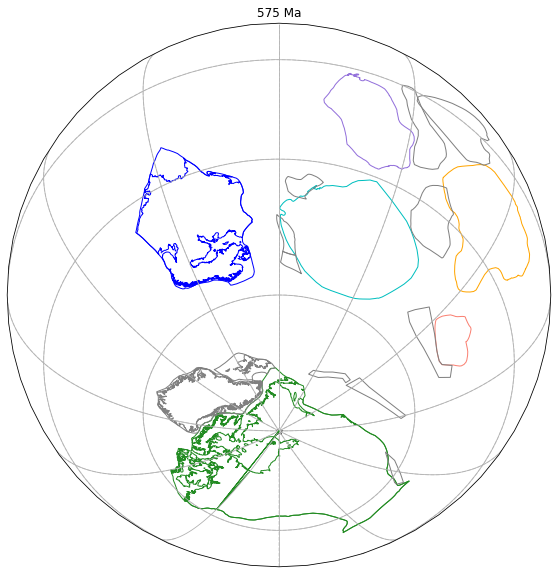

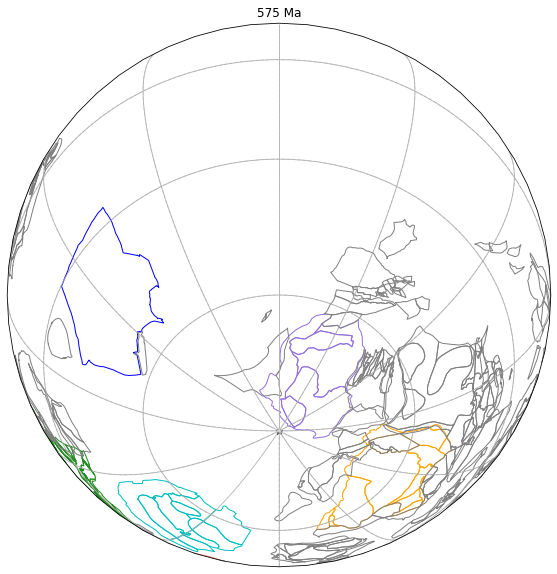

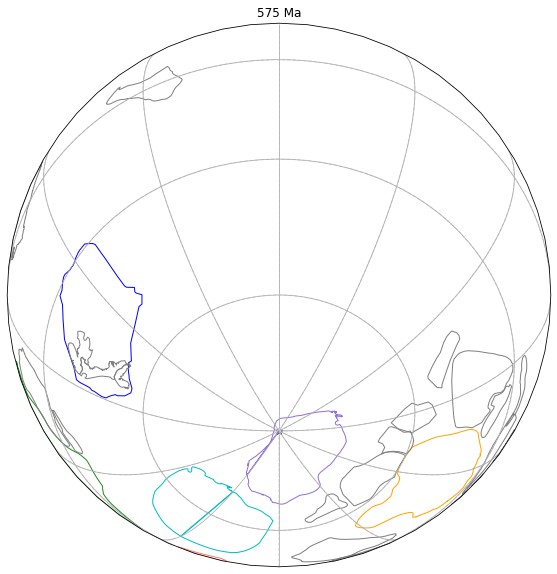

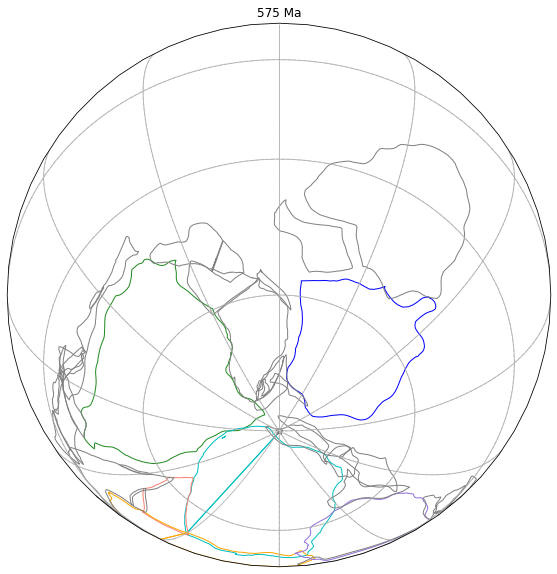

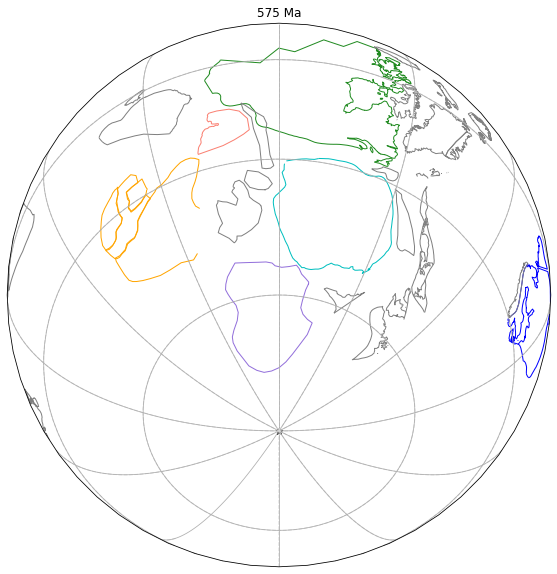

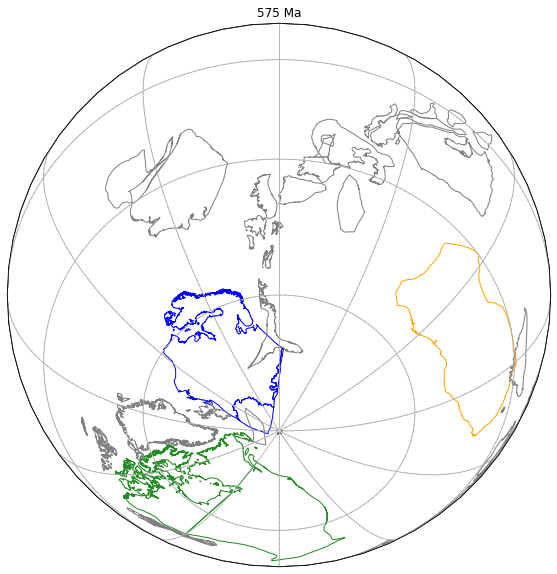

In [16]:
# fig = plt.figure(figsize=(15, 10))
# i = 0
# subplots_grid = [3, 2, 0]
for model_name in ['R21', 'M21', 'M17', 'S21', 'L08', 'TC16']:
    # subplots_grid[2] = i + 1
    plot_global_av_recon(mname=model_name, projtype='orth', plotpolesflag=0, savefigflag=1)

# plt.savefig(f'./Global_Rec_comparison.pdf')
